In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [24]:
X_train = np.loadtxt('input.csv',delimiter =',')
Y_train = np.loadtxt('labels.csv',delimiter =',')

X_test = np.loadtxt('input_test.csv',delimiter =',')
Y_test = np.loadtxt('labels_test.csv',delimiter =',')

In [25]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [26]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


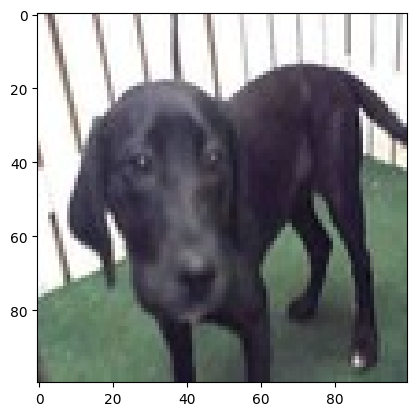

In [27]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [28]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation ='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

In [29]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5045 - loss: 0.7046
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6155 - loss: 0.6654
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6865 - loss: 0.6001
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7175 - loss: 0.5480
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7650 - loss: 0.4969


In [31]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6775 - loss: 0.6047


[0.6047497391700745, 0.6775000095367432]

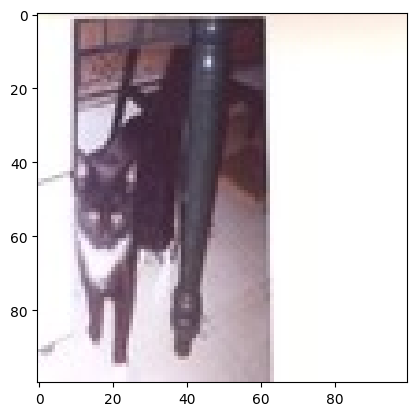

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Our model says it is a: dog


In [32]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

Y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
Y_pred = Y_pred > 0.5

if (Y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a:", pred)
